# Stochastic Gradient Descent with Linear Regression Sample

In [1]:
%matplotlib inline
from fastai.vision import *

In [2]:
n = 100

In [9]:
x = torch.ones(n,2) #create 100 tuples with two 1s

In [14]:
x[:,0].uniform_(-1,1) #make uniform dist between -1 and 1 on the first column

tensor([ 0.5401,  0.9429, -0.8049,  0.4372,  0.8889, -0.3232,  0.2564, -0.6044,
        -0.0668, -0.8515,  0.4381,  0.5292,  0.1968, -0.1804,  0.3622,  0.7800,
         0.3061, -0.0481, -0.0159, -0.9279, -0.1896,  0.0958, -0.7279,  0.5931,
         0.7296,  0.4769, -0.2020, -0.4067,  0.6351,  0.7714,  0.1844,  0.2630,
        -0.5498, -0.8722, -0.7638, -0.7075, -0.9479, -0.8247,  0.0836,  0.9002,
         0.8864,  0.0589, -0.6307,  0.6585,  0.2375,  0.7218,  0.0106, -0.9853,
         0.3781,  0.4771,  0.6094, -0.9208,  0.2331, -0.7706,  0.0628,  0.7013,
        -0.2173,  0.2606, -0.6626, -0.3752,  0.6686,  0.2971, -0.8411, -0.2470,
        -0.7364, -0.5890,  0.8264,  0.2823,  0.3726,  0.2574,  0.3826,  0.3131,
         0.8684, -0.8503,  0.0345, -0.7190, -0.6539,  0.4733,  0.3259, -0.0371,
         0.4760,  0.3784,  0.6353,  0.0544,  0.7457, -0.3221, -0.7602,  0.1167,
        -0.1545, -0.6070, -0.0271, -0.9346,  0.0489, -0.5314, -0.7799,  0.3490,
         0.2372, -0.4343,  0.5361, -0.09

In [15]:
x[:5]

tensor([[ 0.5401,  1.0000],
        [ 0.9429,  1.0000],
        [-0.8049,  1.0000],
        [ 0.4372,  1.0000],
        [ 0.8889,  1.0000]])

In [18]:
a = tensor(3.,2.); a

tensor([3., 2.])

In [23]:
y = x@a + torch.rand(n) 
# @ = matrix multiplication 
# add some noise

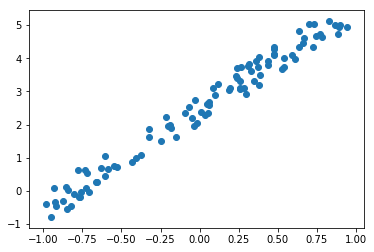

In [24]:
plt.scatter(x[:,0],y)

Find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [25]:
def mse(y_hat, y):
    return ((y_hat - y)**2).mean()

Let's suppose `a=(-1.0, 1.0)` 

In [36]:
a = tensor(-1.,1.)

In [37]:
y_hat = x@a

In [38]:
mse(y_hat, y) #mse is huge

tensor(7.4577)

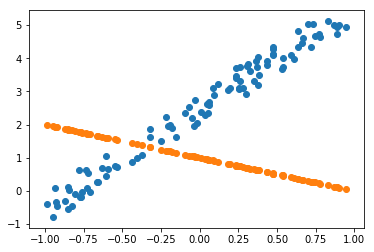

In [40]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat) #it is totally wrong! we need better `a`

Let's find the best values of `a` using SGD

### Gradient Descent

In [41]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [42]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [43]:
lr = 1e-1

In [44]:
for t in range(100): update()

tensor(7.4577, grad_fn=<MeanBackward0>)
tensor(1.5057, grad_fn=<MeanBackward0>)
tensor(0.4594, grad_fn=<MeanBackward0>)
tensor(0.1808, grad_fn=<MeanBackward0>)
tensor(0.1049, grad_fn=<MeanBackward0>)
tensor(0.0842, grad_fn=<MeanBackward0>)
tensor(0.0786, grad_fn=<MeanBackward0>)
tensor(0.0770, grad_fn=<MeanBackward0>)
tensor(0.0766, grad_fn=<MeanBackward0>)
tensor(0.0765, grad_fn=<MeanBackward0>)


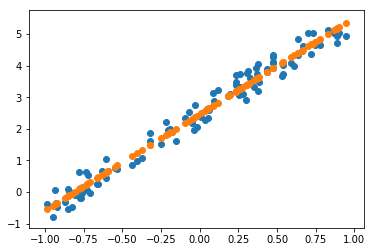

In [47]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

### Animation

In [48]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [49]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)